In [12]:
# download, preprocess, and postprocess SV3 data
import os
from pathlib import Path

os.environ["GARPOS_PATH"] = str(Path.home() / "Project/SeaFloorGeodesy" / "garpos")

os.environ["DYLD_LIBRARY_PATH"] = (
    os.environ.get("CONDA_PREFIX", "")
    + "/lib:"
    + os.environ.get("DYLD_LIBRARY_PATH", "")
)
PRIDE_DIR = Path.home() / ".PRIDE_PPPAR_BIN"
os.environ["PATH"] += os.pathsep + str(PRIDE_DIR)
from es_sfgtools.data_mgmt.data_handler import DataHandler
from es_sfgtools.data_mgmt.post_processing import IntermediateDataProcessor
from es_sfgtools.modeling.garpos_tools.garpos_handler import GarposHandler
from es_sfgtools.logging import remove_all_loggers_from_console
remove_all_loggers_from_console()
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [13]:
main_dir = Path("/Users/franklyndunbar/Project/SeaFloorGeodesy/Data/SFGMain2")
network = "cascadia-gorda"
campaign = "2025_A_1126"
run_id = "Test2"
dh = DataHandler(main_dir)

filter_config = {
    "pride_residuals": {"enabled": False, "max_residual_mm": 8},
    "max_distance_from_center": {"enabled": False, "max_distance_m": 500.0},
    "ping_replies": {"enabled": False, "min_replies": 1},
    "acoustic_filters": {"enabled": True, "level": "OK"}
}
garpos_config = {
    "maxloop": 50,
}
garpos_config_nbr1 = {
    "maxloop": 100,
}
override_survey_parsing = False
override_garpos_parsing = False
override_garpos_modeling = False
show_garpos_plots = True
garpos_iterations = 2



Array Final Position: East -3.0114 m, North 54.0896 m, Up -1826.1342 m
 Sig East 0.23 m  Sig North 0.14 m  Sig Up 0.28 m 
Array Delta Position :  East 1.686 m, North -1.175 m, Up -1.302 m 
TSP M5209 : East -33.699 m, North 1403.922 m, Up -1831.845 m 
TSP M5210 : East -1253.156 m, North -694.086 m, Up -1868.087 m 
TSP M5211 : East 1267.703 m, North -540.520 m, Up -1770.660 m 



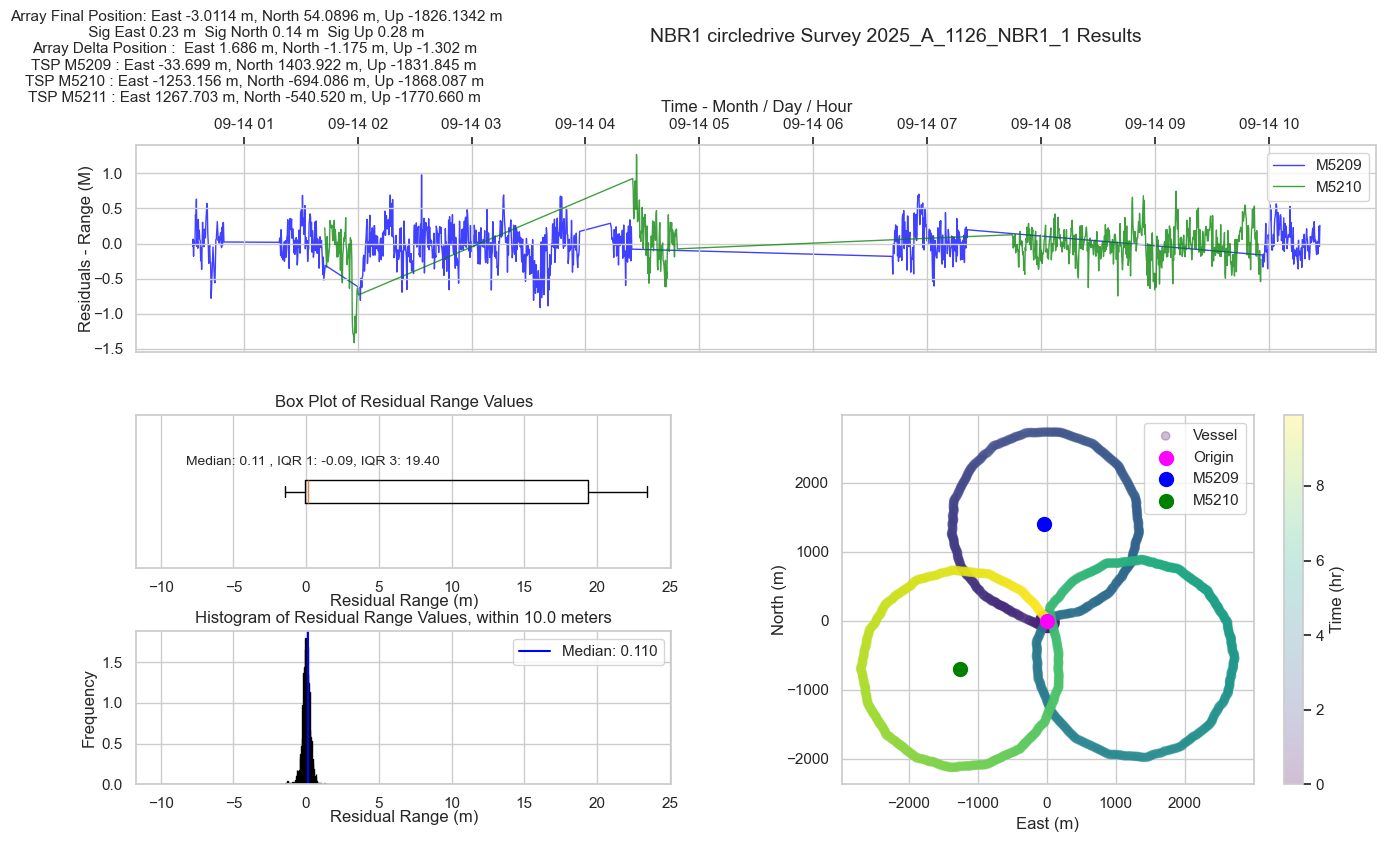

Array Final Position: East -4.6898 m, North 54.6921 m, Up -1824.4355 m
 Sig East 0.18 m  Sig North 0.12 m  Sig Up 0.22 m 
Array Delta Position :  East 0.847 m, North -0.873 m, Up -0.452 m 
TSP M5209 : East -33.699 m, North 1403.922 m, Up -1831.845 m 
TSP M5210 : East -1253.156 m, North -694.086 m, Up -1868.087 m 
TSP M5211 : East 1267.703 m, North -540.520 m, Up -1770.660 m 



<Figure size 640x480 with 0 Axes>

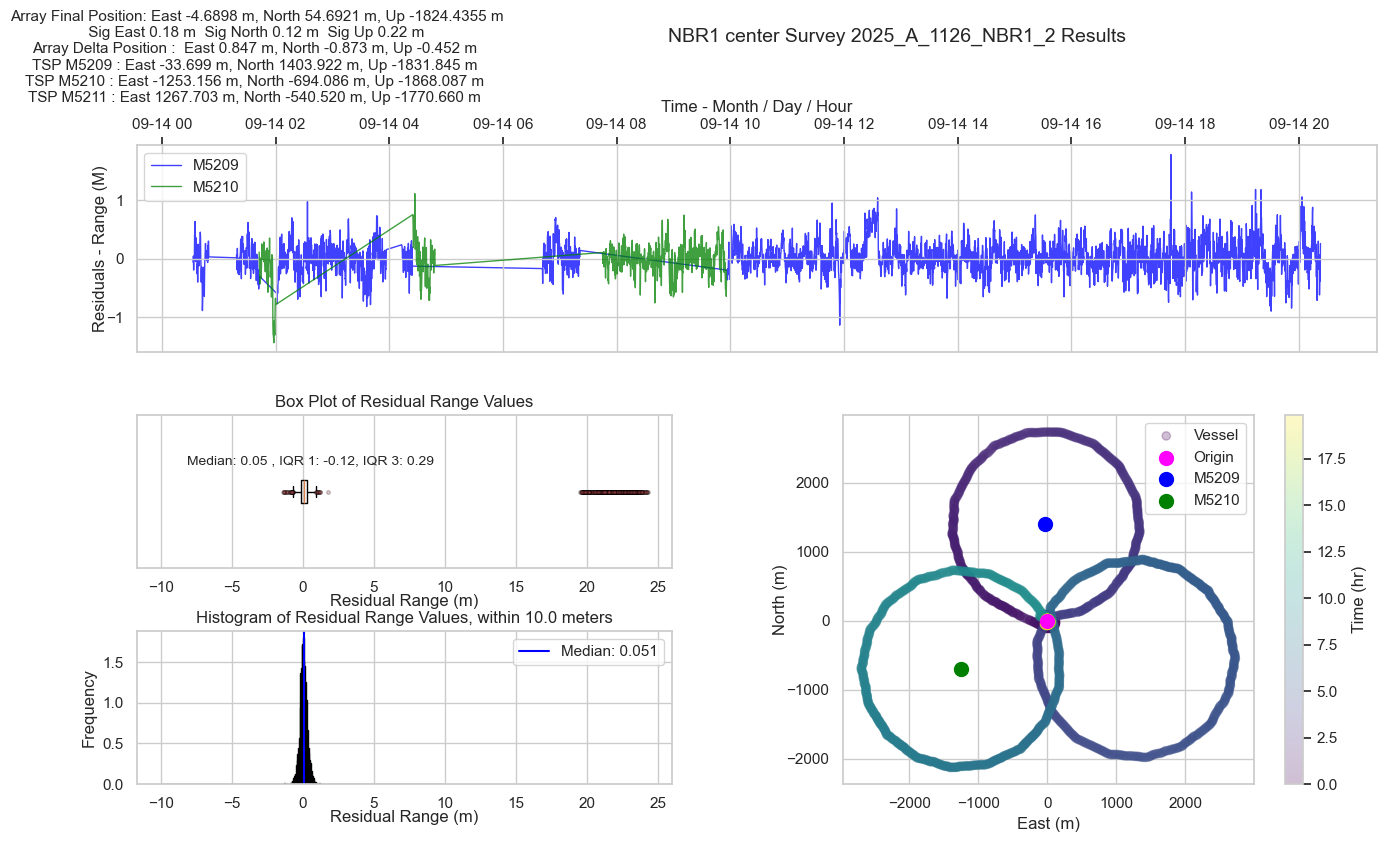

Array Final Position: East -12.0640 m, North 60.7987 m, Up -1762.7843 m
 Sig East 10.29 m  Sig North 8.49 m  Sig Up 9.60 m 
Array Delta Position :  East -2.840 m, North 2.180 m, Up 30.373 m 
TSP M5209 : East -33.699 m, North 1403.922 m, Up -1831.845 m 
TSP M5210 : East -1253.156 m, North -694.086 m, Up -1868.087 m 
TSP M5211 : East 1267.703 m, North -540.520 m, Up -1770.660 m 



<Figure size 640x480 with 0 Axes>

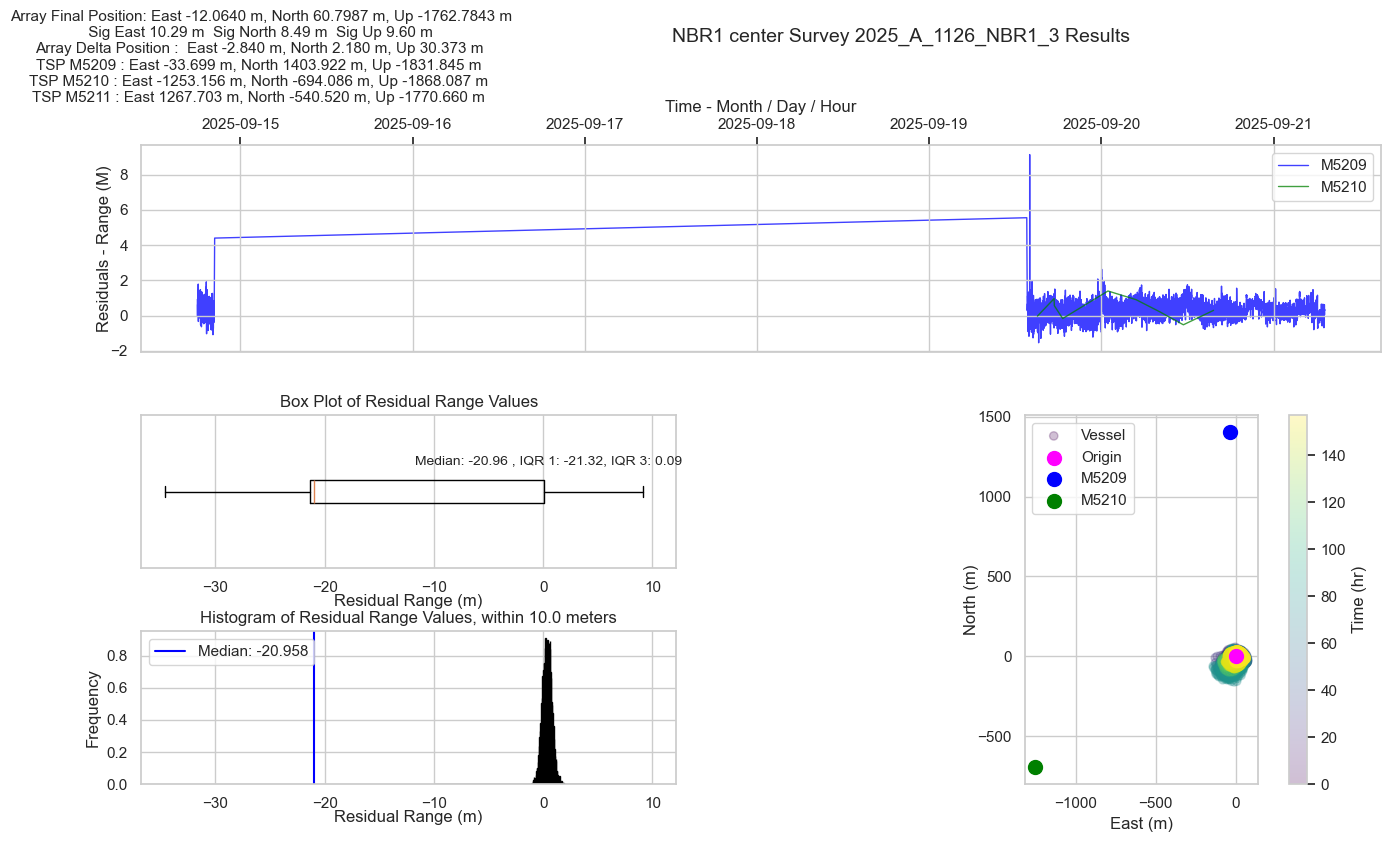

<Figure size 640x480 with 0 Axes>

In [14]:
station = "NBR1"
raw_dir_ncc1 = main_dir / network / station / campaign / "raw"
dh.change_working_station(network=network, station=station, campaign=campaign)
dh.discover_data_and_add_files(raw_dir_ncc1)
nbr1_pipeline, nbr1_config = dh.get_pipeline_sv3()
nbr1_pipeline.run_pipeline()
nbr1MidProcess: IntermediateDataProcessor = dh.getIntermediateDataProcessor()
nbr1MidProcess.parse_surveys(override=override_survey_parsing)
nbr1MidProcess.prepare_shotdata_garpos(
    custom_filters=filter_config, overwrite=override_garpos_parsing
)
gp_handler_nbr1: GarposHandler = dh.getGARPOSHandler()

'''
gp_handler_nbr1.run_garpos(
    run_id=run_id,
    iterations=garpos_iterations,
    override=override_garpos_modeling,
    custom_settings=garpos_config_nbr1,
)
'''

gp_handler_nbr1.plot_ts_results(
    run_id=run_id, res_filter=10, savefig=True, showfig=show_garpos_plots
)

Array Final Position: East 114.9949 m, North 136.4086 m, Up -1040.0961 m
 Sig East 0.03 m  Sig North 0.08 m  Sig Up 0.17 m 
Array Delta Position :  East -0.056 m, North 1.963 m, Up -28.702 m 
TSP M5209 : East 706.830 m, North -171.413 m, Up -980.985 m 
TSP M5210 : East -729.648 m, North -57.528 m, Up -987.050 m 
TSP M5211 : East 368.137 m, North 626.390 m, Up -980.043 m 



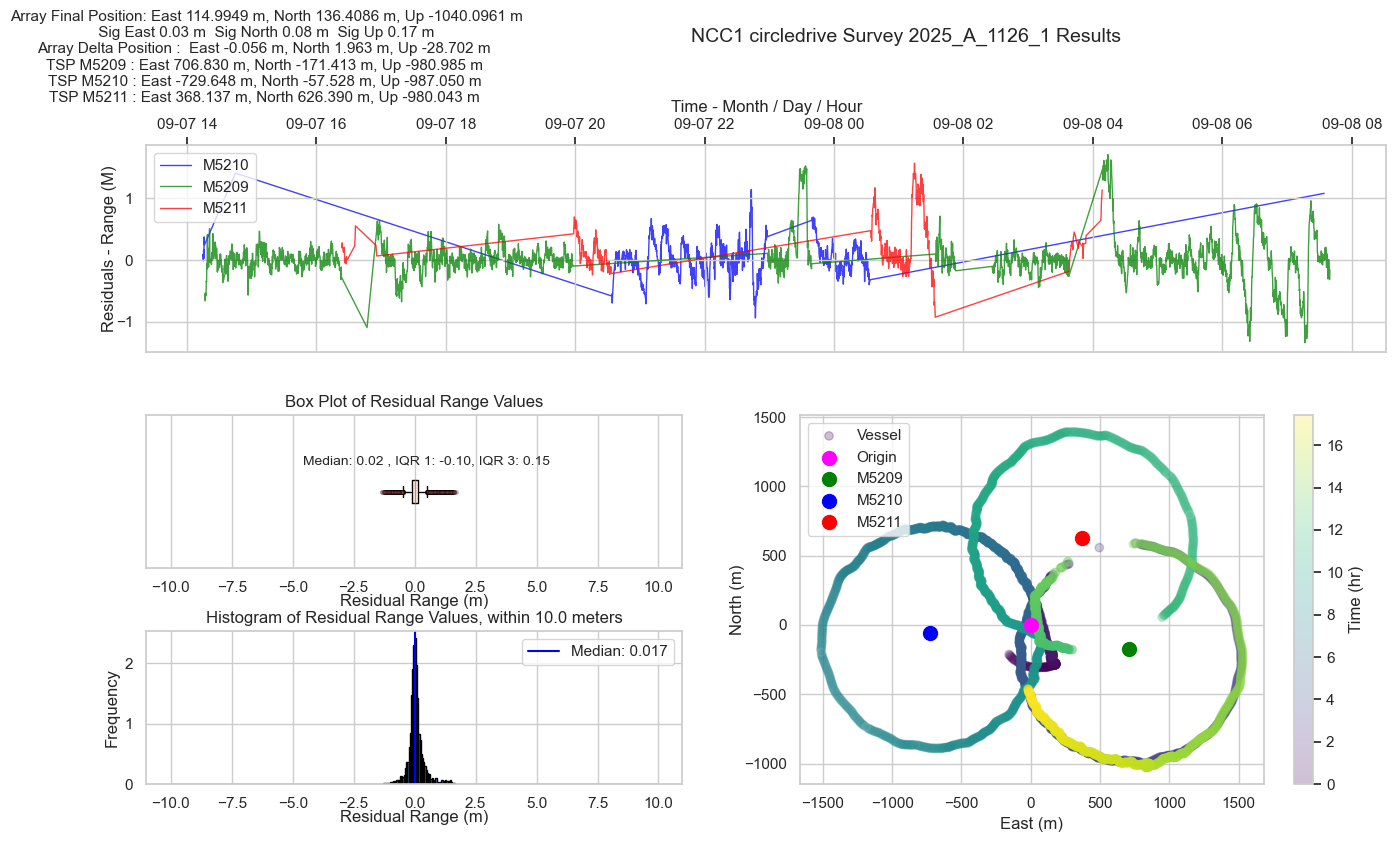

Array Final Position: East 115.7365 m, North 135.3947 m, Up -1036.2665 m
 Sig East 0.04 m  Sig North 0.06 m  Sig Up 0.06 m 
Array Delta Position :  East 0.315 m, North 1.456 m, Up -26.787 m 
TSP M5209 : East 706.830 m, North -171.413 m, Up -980.985 m 
TSP M5210 : East -729.648 m, North -57.528 m, Up -987.050 m 
TSP M5211 : East 368.137 m, North 626.390 m, Up -980.043 m 



<Figure size 640x480 with 0 Axes>

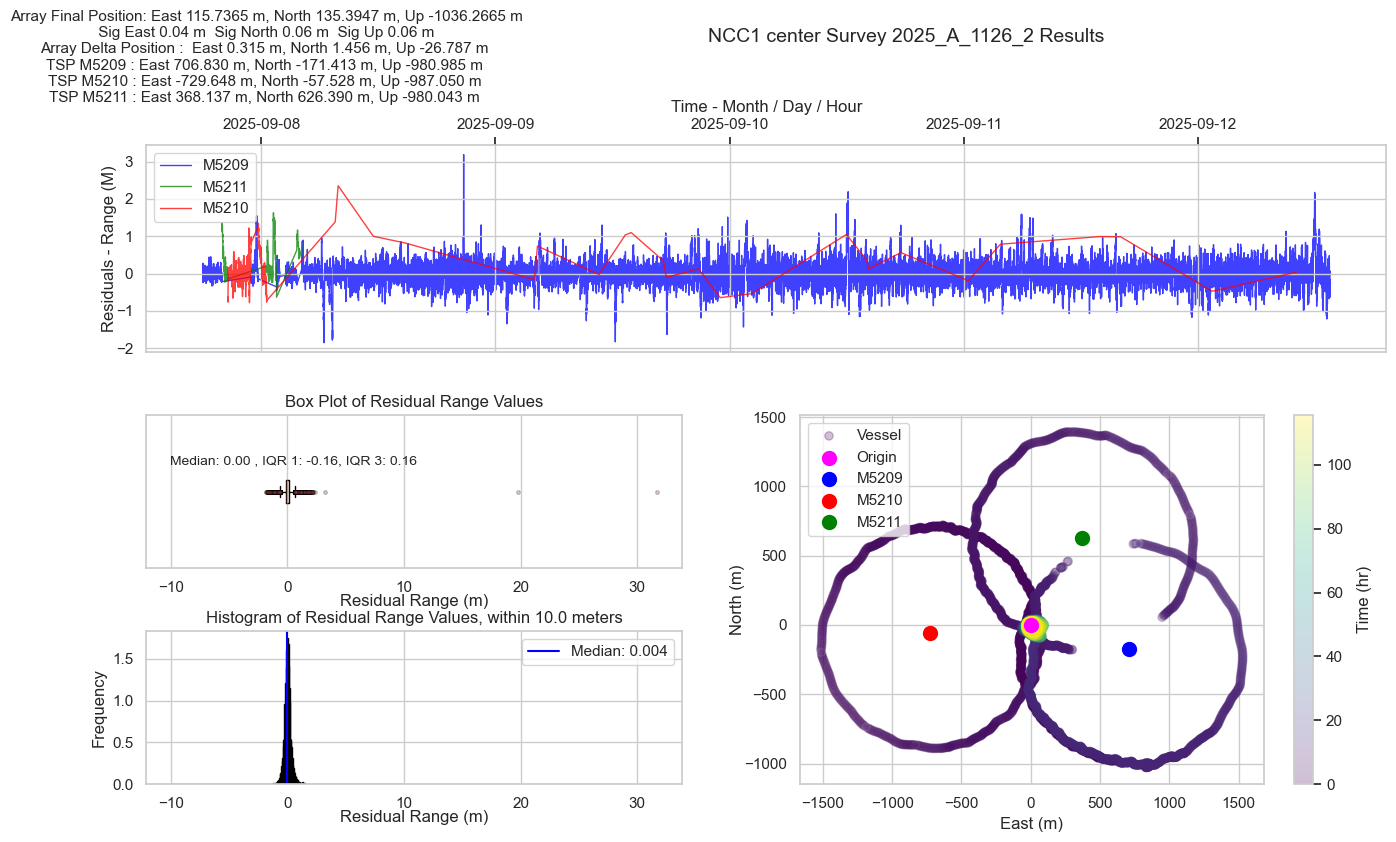

Array Final Position: East 115.1482 m, North 133.4244 m, Up -1037.2983 m
 Sig East 0.03 m  Sig North 0.10 m  Sig Up 0.09 m 
Array Delta Position :  East 0.021 m, North 0.471 m, Up -27.303 m 
TSP M5209 : East 706.830 m, North -171.413 m, Up -980.985 m 
TSP M5210 : East -729.648 m, North -57.528 m, Up -987.050 m 
TSP M5211 : East 368.137 m, North 626.390 m, Up -980.043 m 



<Figure size 640x480 with 0 Axes>

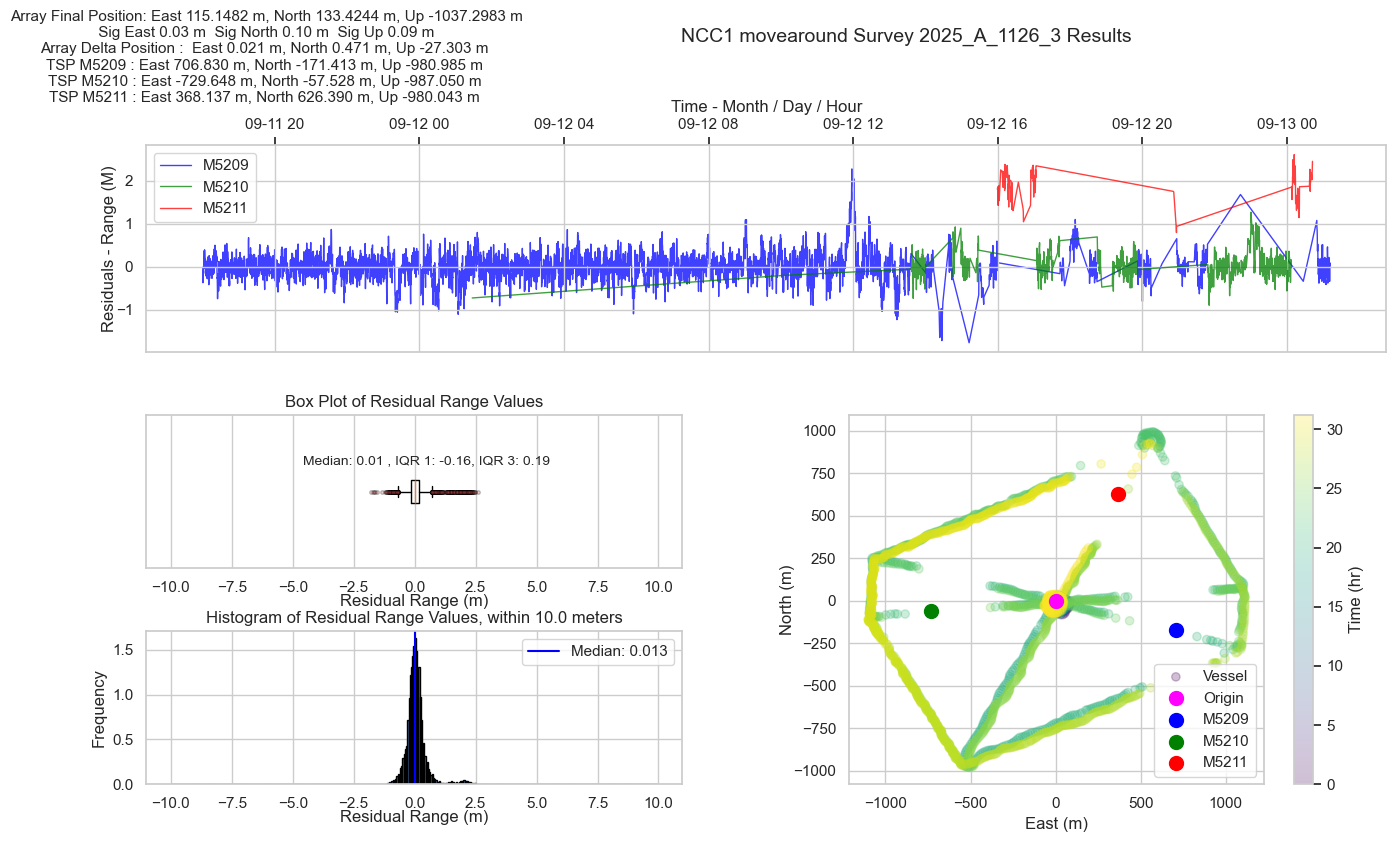

<Figure size 640x480 with 0 Axes>

In [15]:
station = "NCC1"
raw_dir_ncc1 = main_dir / network / station / campaign / "raw"
dh.change_working_station(network=network, station=station, campaign=campaign)
dh.discover_data_and_add_files(raw_dir_ncc1)
ncc1_pipeline, ncc1_config = dh.get_pipeline_sv3()
ncc1_pipeline.run_pipeline()
ncc1MidProcess: IntermediateDataProcessor = dh.getIntermediateDataProcessor()
ncc1MidProcess.parse_surveys(override=override_survey_parsing)
ncc1MidProcess.prepare_shotdata_garpos(
    custom_filters=filter_config, overwrite=override_garpos_parsing
)
gp_handler_ncc1: GarposHandler = dh.getGARPOSHandler()
'''
gp_handler_ncc1.run_garpos(
    run_id=run_id,
    iterations=garpos_iterations,
    override=override_garpos_modeling,
    custom_settings=garpos_config,
)
'''

gp_handler_ncc1.plot_ts_results(
    run_id=run_id, res_filter=10, savefig=True, showfig=show_garpos_plots
)

Processing DFOP00 Files:   0%|          | 0/1 [00:00<?, ?it/s]

Array Final Position: East -17.4352 m, North 36.1509 m, Up -1300.9995 m
 Sig East 0.02 m  Sig North 0.02 m  Sig Up 0.07 m 
Array Delta Position :  East 0.175 m, North 0.482 m, Up -32.223 m 
TSP M5209 : East -96.871 m, North 1012.938 m, Up -1237.041 m 
TSP M5210 : East -887.357 m, North -497.747 m, Up -1236.276 m 
TSP M5211 : East 930.871 m, North -409.632 m, Up -1236.343 m 

Array Final Position: East -18.8792 m, North 36.5982 m, Up -1301.8793 m
 Sig East 0.02 m  Sig North 0.02 m  Sig Up 0.05 m 
Array Delta Position :  East -0.547 m, North 0.706 m, Up -32.663 m 
TSP M5209 : East -96.871 m, North 1012.938 m, Up -1237.041 m 
TSP M5210 : East -887.357 m, North -497.747 m, Up -1236.276 m 
TSP M5211 : East 930.871 m, North -409.632 m, Up -1236.343 m 

Array Final Position: East -19.0619 m, North 36.8408 m, Up -1299.9313 m
 Sig East 0.02 m  Sig North 0.02 m  Sig Up 0.07 m 
Array Delta Position :  East -0.638 m, North 0.827 m, Up -31.689 m 
TSP M5209 : East -96.871 m, North 1012.938 m, Up -12

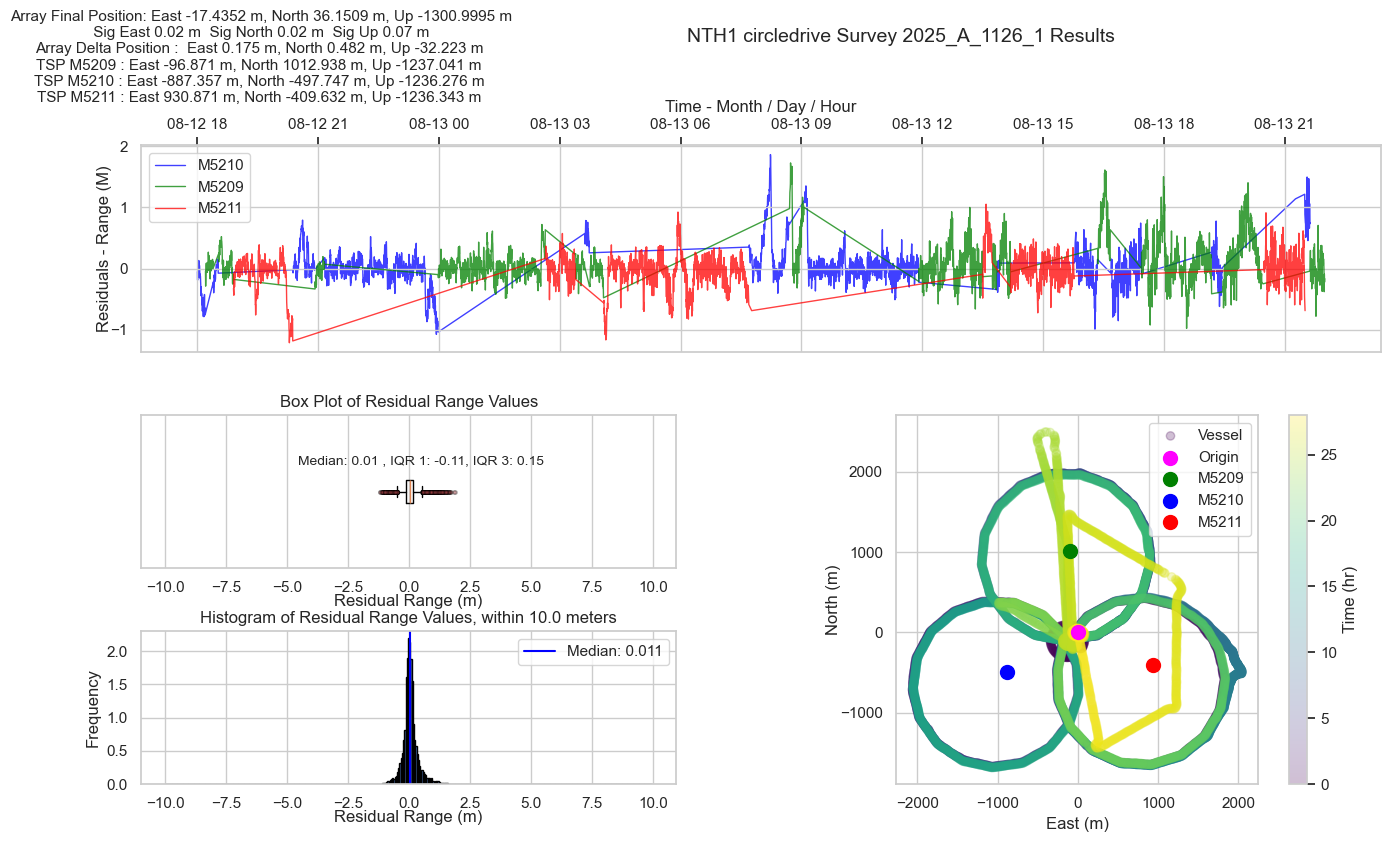

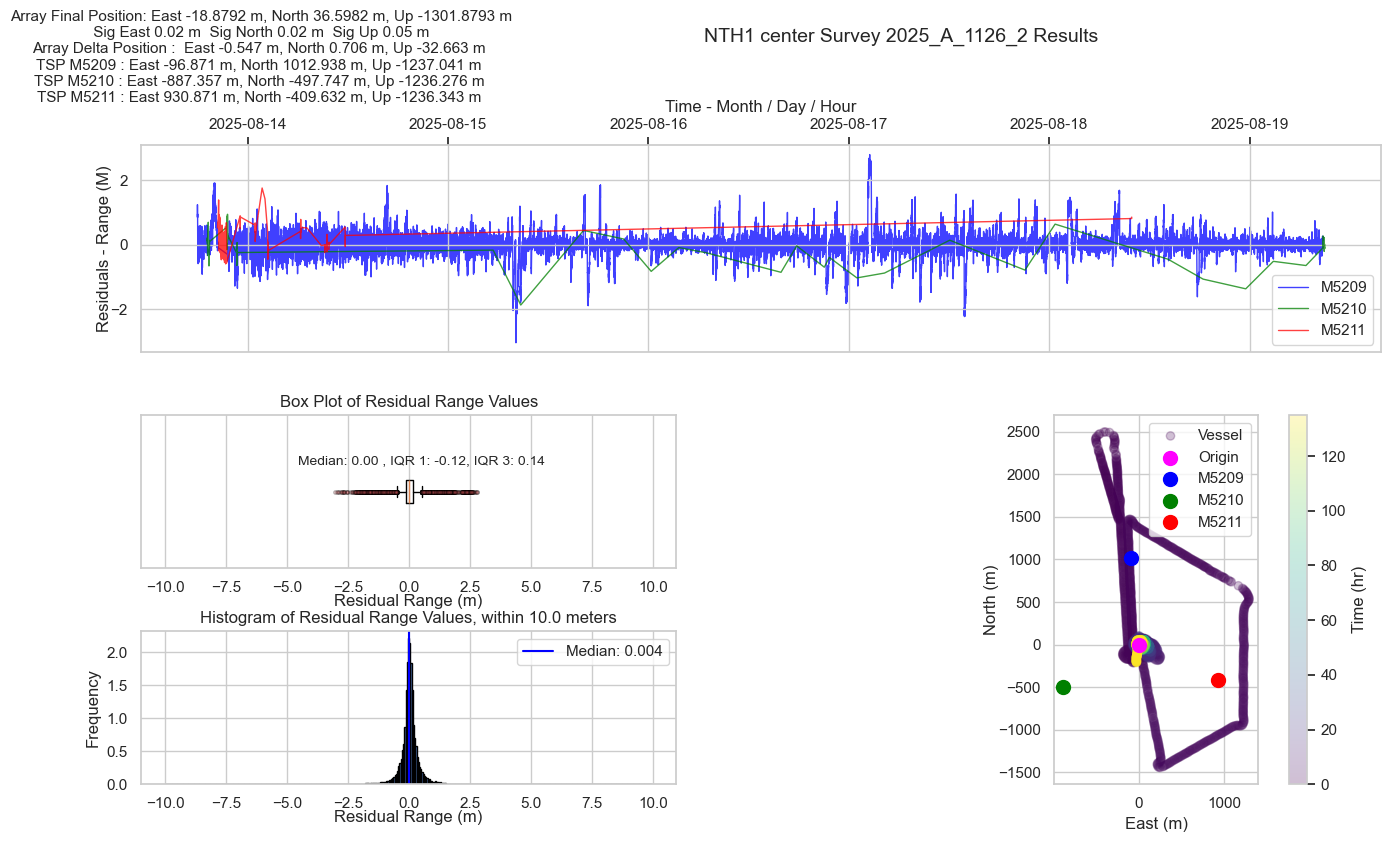

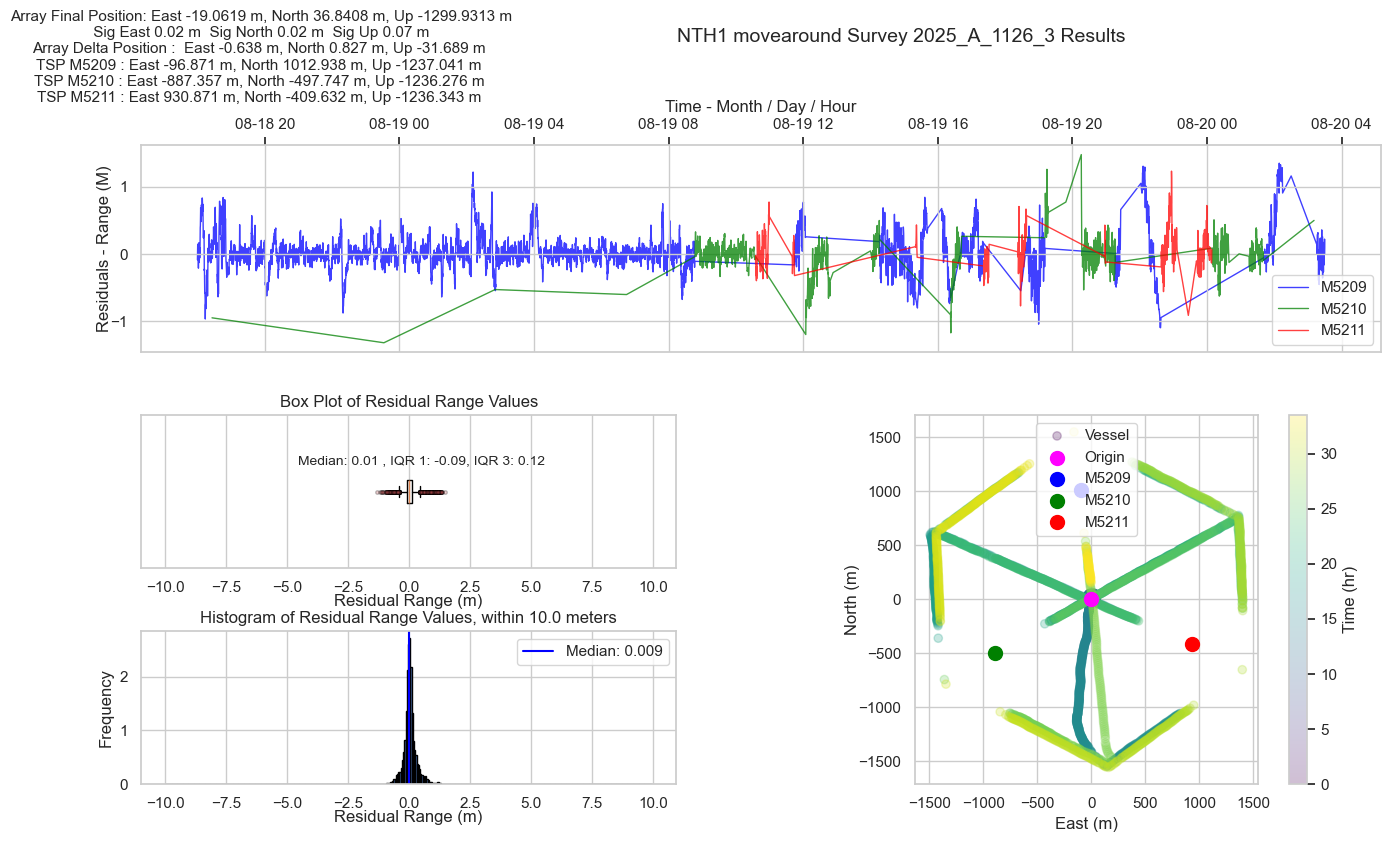

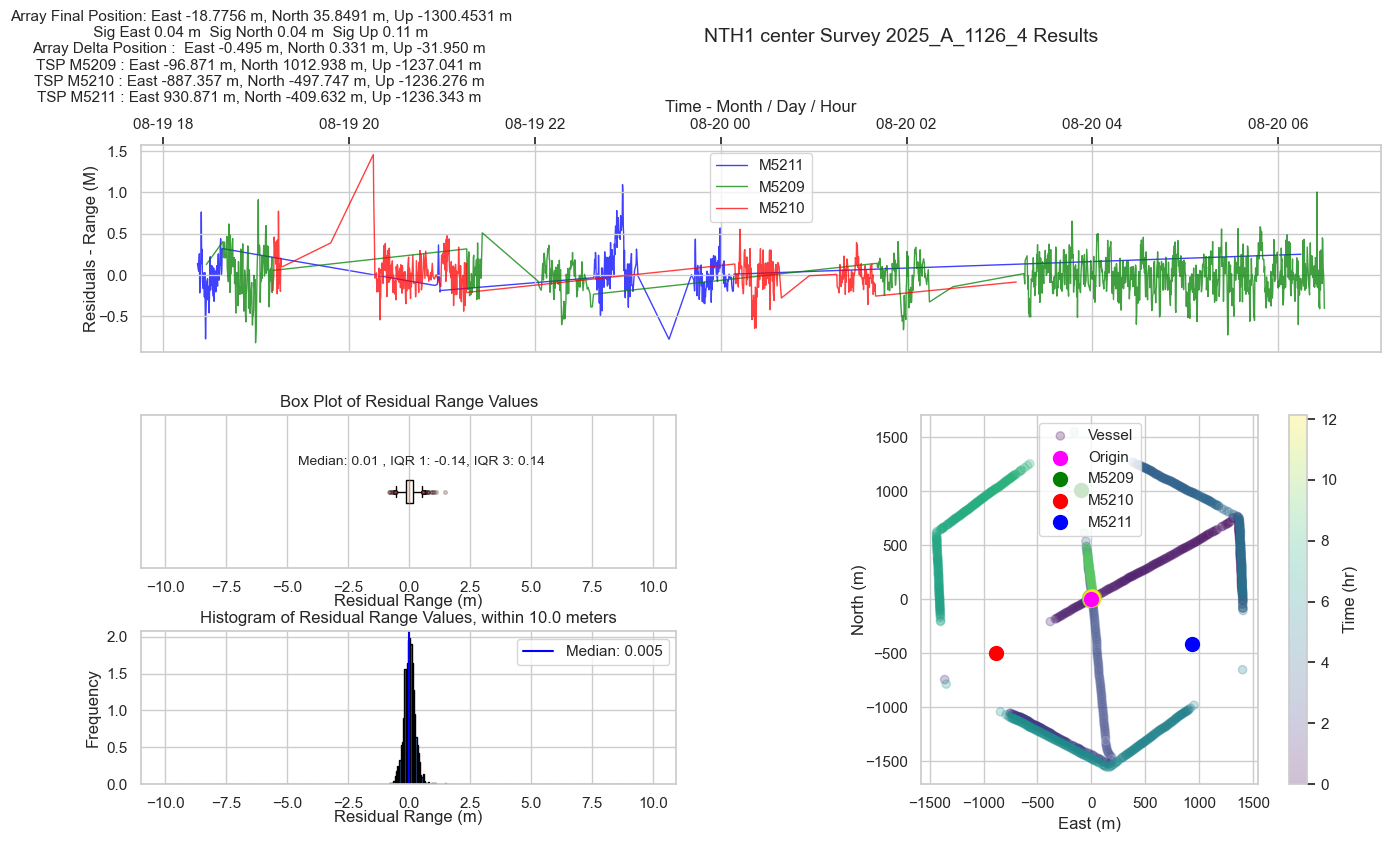

In [16]:
station = 'NTH1'
raw_dir_nth1 = main_dir / network / station / campaign / "raw"
dh.change_working_station(network=network, station=station, campaign=campaign)
dh.discover_data_and_add_files(raw_dir_nth1)
nth1_pipeline,nth1_config = dh.get_pipeline_sv3()
nth1_pipeline.run_pipeline()
nth1MidProcess:IntermediateDataProcessor = dh.getIntermediateDataProcessor()
nth1MidProcess.parse_surveys(override=override_survey_parsing)
nth1MidProcess.prepare_shotdata_garpos(custom_filters=filter_config,overwrite=override_garpos_parsing)
gp_handler_nth1: GarposHandler = dh.getGARPOSHandler()
'''
gp_handler_nth1.run_garpos(run_id=run_id, iterations=garpos_iterations, override=override_garpos_modeling, custom_settings=garpos_config)
'''
gp_handler_nth1.plot_ts_results(run_id=run_id, res_filter=10, savefig=True,showfig=False)
